In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_context('notebook')

RANDOM_SEED = 20090425

In [2]:
import pymc3
    
from pymc3 import Poisson
x = Poisson.dist(mu=1)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
samples = x.random(size=10000)

In [4]:
samples.mean()

1.0062

(array([3688., 3642., 1833.,  644.,  150.,   36.,    7.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

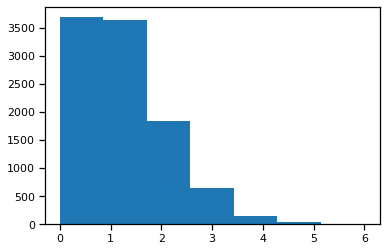

In [5]:
plt.hist(samples, bins=len(set(samples)))

In [6]:
from pymc3 import Normal
y = Normal.dist(mu=-2, sd=4)
samples = y.random(size=10000)

In [7]:
samples.mean()

-1.9483741951016036

In [8]:
samples.std()

4.025103898006148

(array([  22.,  125.,  554., 1484., 2578., 2723., 1727.,  637.,  138.,
          12.]),
 array([-16.77318727, -13.84757889, -10.92197051,  -7.99636213,
         -5.07075375,  -2.14514537,   0.78046301,   3.70607139,
          6.63167977,   9.55728815,  12.48289653]),
 <BarContainer object of 10 artists>)

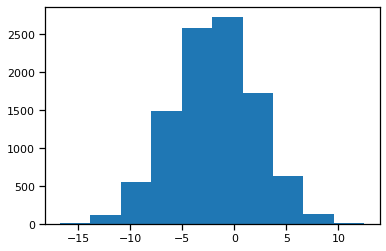

In [9]:
plt.hist(samples)

In [10]:
radon = pd.read_csv('radon.csv', index_col=0)

In [11]:
radon.head()

,idnum,state,state2,stfips,zip,region,typebldg,floor,room,basement,...,pcterr,adjwt,dupflag,zipflag,cntyfips,county,fips,Uppm,county_code,log_radon
0,5081.0,MN,MN,27.0,55735,5.0,1.0,1.0,3.0,N,...,9.7,1146.499190,1.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
1,5082.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,...,14.5,471.366223,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
2,5083.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,...,9.6,433.316718,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,1.098612
3,5084.0,MN,MN,27.0,56469,5.0,1.0,0.0,4.0,Y,...,24.3,461.623670,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.095310
4,5085.0,MN,MN,27.0,55011,3.0,1.0,0.0,4.0,Y,...,13.8,433.316718,0.0,0.0,3.0,ANOKA,27003.0,0.428565,1,1.163151


D:\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_radon', ylabel='Density'>

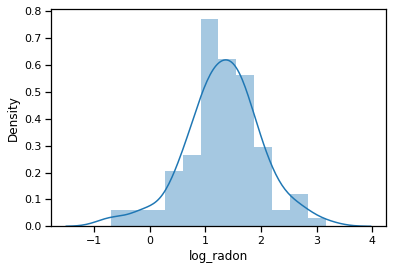

In [12]:
hennepin_radon = radon.query('county=="HENNEPIN"').log_radon
sns.distplot(hennepin_radon)

In [14]:
hennepin_radon.shape

(105,)

In [15]:
from pymc3 import Model, Uniform
with Model() as radon_model:
    u = Normal('u', mu=0, sd=10)
    o = Uniform('o', 0, 10)


You can find the C code in this temporary file: C:\Users\JON\AppData\Local\Temp\theano_compilation_error_1jtzmc5e


Exception: ('Compilation failed (return status=1): cc1plus.exe: sorry, unimplemented: 64-bit mode not compiled in. ', 'FunctionGraph(Elemwise{true_div,no_inplace}(TensorConstant{1.0}, TensorConstant{0.01}))')

In [16]:
with radon_model:
    y = Normal('y', mu=u, sd=0, observed=hennepin_radon)

NameError: name 'u' is not defined

In [17]:
from pymc3 import fit
with radon_model:
    samples = fit(random_seed=RANDOM_SEED).sample(1000)

TypeError: Model does not have FreeRVs

<AxesSubplot:title={'center':'x'}>

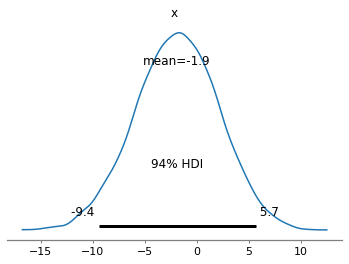

In [18]:
from pymc3 import plot_posterior
plot_posterior(samples)

In [19]:
mus = samples['u']
sigmas = samples['o']
mus

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [21]:
radon_samples = Normal.dist(mus, sigmas).random()

NameError: name 'mus' is not defined

In [22]:
(radon_samples > np.log(4)).mean()

NameError: name 'radon_samples' is not defined

In [23]:
sns.distplot(radon_samples, label='simulated')
sns.distplot(hennepin_radon, label='observed')
plt.legend()

NameError: name 'radon_samples' is not defined

In [24]:
from pymc3 import Flat, HalfCauchy

with Model() as prior_sensitivity:
    u = Flat('u')
    o = HalfCauchy('o', 5)
    dist = Normal('dist', mu=u, sd=o, observed=hennepin_radon)
    sensitivity_samples = fit(random_seed=RANDOM_SEED).sample(1000)


You can find the C code in this temporary file: C:\Users\JON\AppData\Local\Temp\theano_compilation_error_fzpnu_jq


Exception: ('Compilation failed (return status=1): cc1plus.exe: sorry, unimplemented: 64-bit mode not compiled in. ', 'FunctionGraph(Elemwise{second,no_inplace}(u, TensorConstant{0.0}))')

In [25]:
plot_posterior(sensitivity_samples)

NameError: name 'sensitivity_samples' is not defined

<AxesSubplot:title={'center':'x'}>

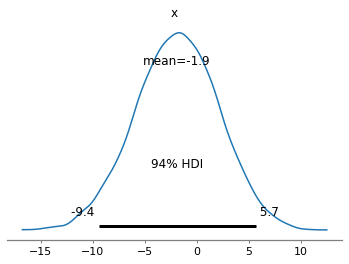

In [26]:
plot_posterior(samples)

In [28]:
drug = pd.DataFrame(dict(iq=(101,100,102,104,102,97,105,105,98,101,100,123,105,103,100,95,102,100,109,102,82,102,100,102,102,101,102,102,103,103,97,97,103,101,97,104,96,103,124,101,101,100,101,101,104,100,101), groups='drug'))

In [29]:
placebo = pd.DataFrame(dict(iq=(99,101,100,101,102,100,97,101,104,101,102,102,100,105,88,101,100,104,100,100,100,101,102,103,97,101,101,100,101,99,101,100,100,101,100,99,101,100,102,99,100,99), groups='placebo'))

In [30]:
trial_data = pd.concat([drug, placebo], ignore_index=True)

array([<AxesSubplot:title={'center':'drug'}>,
       <AxesSubplot:title={'center':'placebo'}>], dtype=object)

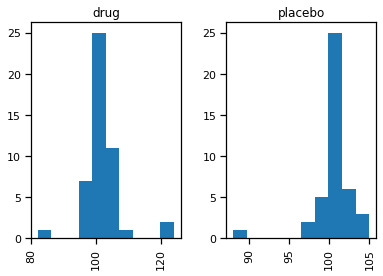

In [31]:
trial_data.hist('iq', by='groups')

In [32]:
from pymc3 import StudentT

In [33]:
t = StudentT.dist(nu=3).random(size=10000)
n = Normal.dist(0, 1).random(size=10000)


You can find the C code in this temporary file: C:\Users\JON\AppData\Local\Temp\theano_compilation_error_3ntet66g


Exception: ('Compilation failed (return status=1): cc1plus.exe: sorry, unimplemented: 64-bit mode not compiled in. ', 'FunctionGraph(Elemwise{gt,no_inplace}(TensorConstant{3.0}, TensorConstant{2}))')

In [34]:
sns.distplot(t, label='Student-T')
sns.distplot(n, label='Normal')
plt.legend()
plt.xlim(-10, 10)

NameError: name 't' is not defined

In [35]:
with Model() as drug_model:
    u_0 = Normal('u_0', 100, sd=10)
    u_1 = Normal('u_1', 100, sd=10)


You can find the C code in this temporary file: C:\Users\JON\AppData\Local\Temp\theano_compilation_error_ngn0i6eu


Exception: ('Compilation failed (return status=1): cc1plus.exe: sorry, unimplemented: 64-bit mode not compiled in. ', 'FunctionGraph(Elemwise{true_div,no_inplace}(TensorConstant{1.0}, TensorConstant{0.01}))')

In [36]:
with drug_model:
    o_0 = Uniform('o_0', lower=0, upper=20)
    o_1 = Uniform('o_1', lower=0, upper=20)


You can find the C code in this temporary file: C:\Users\JON\AppData\Local\Temp\theano_compilation_error_bohv5622


Exception: ('Compilation failed (return status=1): cc1plus.exe: sorry, unimplemented: 64-bit mode not compiled in. ', 'FunctionGraph(Elemwise{add,no_inplace}(TensorConstant{20.0}, TensorConstant{0.0}))')

In [37]:
from pymc3 import Exponential

with drug_model:
    v = Exponential('v_minus_one', 1/29.) + 1


You can find the C code in this temporary file: C:\Users\JON\AppData\Local\Temp\theano_compilation_error_clauozk6


Exception: ('Compilation failed (return status=1): cc1plus.exe: sorry, unimplemented: 64-bit mode not compiled in. ', 'FunctionGraph(Elemwise{true_div,no_inplace}(TensorConstant{1.0}, TensorConstant{0.034482758620689655}))')

In [38]:
sns.distplot(Exponential.dist(1/29).random(size=10000), kde=False)


You can find the C code in this temporary file: C:\Users\JON\AppData\Local\Temp\theano_compilation_error_q3zvf873


Exception: ('Compilation failed (return status=1): cc1plus.exe: sorry, unimplemented: 64-bit mode not compiled in. ', 'FunctionGraph(Elemwise{true_div,no_inplace}(TensorConstant{1.0}, TensorConstant{0.034482758620689655}))')

In [39]:
from pymc3 import StudentT
with drug_model:
    drug_like = StudentT('drug_like', nu=v, mu=u_1, lam=o_1**-2, observed=drug.iq)
    placebo_like = StudentT('placebo_like', nu=v, mu=u_0, lam=o_0**-2, observed=placebo.iq)

NameError: name 'v' is not defined

In [40]:
from pymc3 import Deterministic

with drug_model:
    diff_of_means = Deterministic('difference of means', u_1 - u_0)
    effect_size = Deterministic('effect size', diff_of_means / np.sqrt((o_1**2 + o_0**2) / 2))

NameError: name 'u_1' is not defined

In [41]:
with drug_model:
    drug_trace = fit(random_seed=RANDOM_SEED).sample(1000)

TypeError: Model does not have FreeRVs

In [42]:
plot_posterior(drug_trace[100:], color='#87ceeb')

NameError: name 'drug_trace' is not defined

In [44]:
plot_posterior(drug_trace[100:], ref_val=0, color='#87ceeb')

NameError: name 'drug_trace' is not defined

In [46]:
nash_precip = pd.read_table('nashville_precip.txt', delimiter='\s+', na_values='NA', index_col=0)
nash_precip.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1871,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65
1872,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38
1873,2.96,7.14,4.11,3.59,6.31,4.20,4.63,2.36,1.81,4.28,4.36,5.94
1874,5.22,9.23,5.36,11.84,1.49,2.87,2.65,3.52,3.12,2.63,6.12,4.19
1875,6.15,3.06,8.14,4.22,1.73,5.63,8.12,1.60,3.79,1.25,5.46,4.30


In [47]:
july_rain = nash_precip.Jul
jan_rain = nash_precip.Jan

<AxesSubplot:>

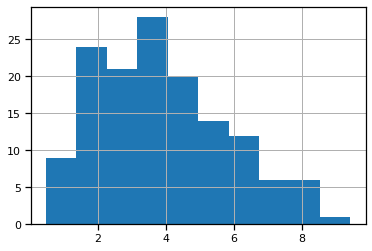

In [48]:
july_rain.hist()

In [49]:
from pymc3 import distributions
dir(distributions)

['AR',
 'AR1',
 'AsymmetricLaplace',
 'BART',
 'Bernoulli',
 'Beta',
 'BetaBinomial',
 'Binomial',
 'Bound',
 'Categorical',
 'Cauchy',
 'ChiSquared',
 'Constant',
 'ConstantDist',
 'Continuous',
 'DensityDist',
 'Dirichlet',
 'DirichletMultinomial',
 'Discrete',
 'DiscreteUniform',
 'DiscreteWeibull',
 'Distribution',
 'ExGaussian',
 'Exponential',
 'Flat',
 'GARCH11',
 'Gamma',
 'GaussianRandomWalk',
 'Geometric',
 'Gumbel',
 'HalfCauchy',
 'HalfFlat',
 'HalfNormal',
 'HalfStudentT',
 'HyperGeometric',
 'Interpolated',
 'InverseGamma',
 'KroneckerNormal',
 'Kumaraswamy',
 'LKJCholeskyCov',
 'LKJCorr',
 'Laplace',
 'LogNormal',
 'Logistic',
 'LogitNormal',
 'Lognormal',
 'MatrixNormal',
 'Mixture',
 'MixtureSameFamily',
 'Moyal',
 'Multinomial',
 'MvGaussianRandomWalk',
 'MvNormal',
 'MvStudentT',
 'MvStudentTRandomWalk',
 'NegativeBinomial',
 'NoDistribution',
 'Normal',
 'NormalMixture',
 'OrderedLogistic',
 'OrderedProbit',
 'Pareto',
 'Poisson',
 'Rice',
 'Simulator',
 'SkewNormal

<AxesSubplot:>

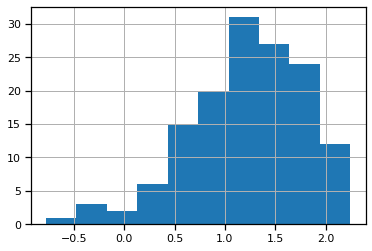

In [50]:
july_rain.apply(np.log).hist()

In [51]:
from pymc3 import Gamma
with Model() as rainfall_model:
    σ = Uniform('σ', 0, 1000)
    mu_jan = Uniform('mu_jan', 0, 25)
    mu_jul = Uniform('mu_jul', 0, 25)
    
    jan = Gamma('jan', mu=mu_jan, sd=σ, observed=jan_rain)
    jul = Gamma('jul', mu=mu_jul, sd=σ, observed=july_rain)
    
    d = Deterministic('d', mu_jan - mu_jul)


You can find the C code in this temporary file: C:\Users\JON\AppData\Local\Temp\theano_compilation_error_4zbctt_8


Exception: ('Compilation failed (return status=1): cc1plus.exe: sorry, unimplemented: 64-bit mode not compiled in. ', 'FunctionGraph(Elemwise{add,no_inplace}(TensorConstant{1000.0}, TensorConstant{0.0}))')

In [52]:
with rainfall_model:
    samples = fit(20000).sample(1000)

TypeError: Model does not have FreeRVs

<AxesSubplot:title={'center':'x'}>

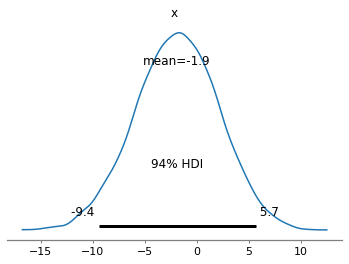

In [53]:
plot_posterior(samples)

In [55]:
vlbw = pd.read_csv('vlbw.csv', index_col=0).dropna(axis=0, subset=['ivh', 'pneumo'])
vlbw.head()

,birth,exit,hospstay,lowph,pltct,race,bwt,gest,inout,twn,...,vent,pneumo,pda,cld,pvh,ivh,ipe,year,sex,dead
5,81.593002,81.598999,2.0,6.969997,54.0,black,925.0,28.0,born at Duke,0.0,...,1.0,1.0,0.0,0.0,definite,definite,NaN,81.594055,female,1
6,81.601997,81.771004,62.0,7.189999,NaN,white,940.0,28.0,born at Duke,0.0,...,1.0,0.0,0.0,0.0,absent,absent,absent,81.602295,female,0
13,81.683998,81.853996,62.0,7.179996,182.0,black,1110.0,28.0,born at Duke,0.0,...,0.0,1.0,0.0,1.0,absent,absent,absent,81.684448,male,0
14,81.689003,81.877998,69.0,7.419998,361.0,white,1180.0,28.0,born at Duke,0.0,...,0.0,0.0,0.0,0.0,absent,absent,absent,81.689880,male,0
16,81.696999,81.952004,93.0,7.239998,255.0,black,770.0,26.0,born at Duke,0.0,...,1.0,0.0,0.0,1.0,absent,absent,absent,81.698120,male,0


In [56]:
pd.crosstab(vlbw.ivh, vlbw.pneumo)

pneumo,0.0,1.0
ivh,,
absent,359,73
definite,45,30
possible,6,4


In [57]:
ivh = vlbw.ivh.isin(['definite', 'possible']).astype(int).values
x = vlbw.pneumo.astype(int).values


You can find the C code in this temporary file: C:\Users\JON\AppData\Local\Temp\theano_compilation_error_nl9yhgml


Exception: ('Compilation failed (return status=1): cc1plus.exe: sorry, unimplemented: 64-bit mode not compiled in. ', 'FunctionGraph(Elemwise{add,no_inplace}(TensorConstant{5.0}, TensorConstant{1.0}))')

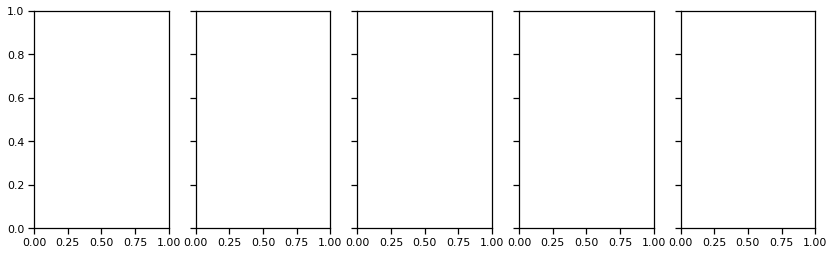

In [58]:
from pymc3 import Beta
params = (5, 1), (1, 3), (5, 5), (0.5, 0.5), (1, 1)

fig, axes = plt.subplots(1, len(params), figsize=(14, 4), sharey=True)
for ax, (alpha, beta) in zip(axes, params):
    sns.distplot(Beta.dist(alpha, beta).random(size=10000), ax=ax, kde=False)
    ax.set_xlim(0, 1)
    ax.set_title(r'$\alpha={0}, \beta={1}$'.format(alpha, beta))

In [59]:
with Model() as ivh_model:
    p = Beta('p', 1, 1, shape=2)


You can find the C code in this temporary file: C:\Users\JON\AppData\Local\Temp\theano_compilation_error_e1w7fhl8


Exception: ('Compilation failed (return status=1): cc1plus.exe: sorry, unimplemented: 64-bit mode not compiled in. ', 'FunctionGraph(Elemwise{add,no_inplace}(TensorConstant{1.0}, TensorConstant{1.0}))')

In [60]:
from pymc3 import Bernoulli

with ivh_model:
    bb_like = Bernoulli('bb_like', p=p[x], observed=ivh)

NameError: name 'p' is not defined

In [61]:
with ivh_model:
    ivh_trace = fit(random_seed=RANDOM_SEED).sample(1000)

TypeError: Model does not have FreeRVs

In [62]:
plot_posterior(ivh_trace[100:], color='#87ceeb')

NameError: name 'ivh_trace' is not defined

In [63]:
plot_posterior(ivh_trace[100:], ref_val=0, color='#87ceeb')

NameError: name 'ivh_trace' is not defined